In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [106]:
df_art = pd.read_csv('data\\art.csv', sep=';')  # Справочник товаров
df_sales = pd.read_csv('data\\sales.csv', sep=';')  # Данные по продажам за ноябрь 2015 г. в детализации День – Магазин – Товар - Сумма_Продаж
df_store = pd.read_csv('data\\store.csv', sep=';')  # Справочник магазинов
df_txn = pd.read_csv('data\\txn.csv', sep=';')  # Данные по продажам за период [2015-10-01, 2015-11-29] в детализации День – Магазин – Товар – Чек - Сумма_Продаж

#### art.csv description

In [3]:
df_art.head(3)
# АРТИКУЛ, НАЗВАНИЕ_ТОВАРА, ГРУППА ТОВАРА

,ART,NAME,GRP
0,16363612,Гуашь 6 цветов_1,Канцелярия
1,191210,Гвоздика_1,Др. пряности
2,16338445,Размораживатель_1,Автотовары


In [4]:
# check NONE/empty data
df_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8434 entries, 0 to 8433
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ART     8434 non-null   int64 
 1   NAME    8434 non-null   object
 2   GRP     8434 non-null   object
dtypes: int64(1), object(2)
memory usage: 197.8+ KB


In [5]:
# convert ART column to string type
df_art['ART'] = df_art['ART'].astype(str)

#### sales.csv

In [6]:
df_sales.head(3)
# День – Магазин – Товар - Сумма_Продаж. (10^4)

,DAY,STORE,ART,SALES
0,2015-11-08,17474,16521444,"133,20000"
1,2015-11-14,1530,343535,"162,00000"
2,2015-11-23,22691,222223,"162,00000"


In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873912 entries, 0 to 873911
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   DAY     873912 non-null  object
 1   STORE   873912 non-null  int64 
 2   ART     873912 non-null  int64 
 3   SALES   873912 non-null  object
dtypes: int64(2), object(2)
memory usage: 26.7+ MB


In [45]:
# converting column types
df_sales['DAY'] = pd.to_datetime(df_sales['DAY'], format='%Y-%m-%d')
for col in ['STORE', 'ART']:
    df_sales[col] = df_sales[col].astype(str)
df_sales['SALES'] = df_sales['SALES'].apply(lambda x: x.replace(',', '.')).astype(float)

In [46]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873912 entries, 0 to 873911
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   DAY     873912 non-null  datetime64[ns]
 1   STORE   873912 non-null  object        
 2   ART     873912 non-null  object        
 3   SALES   873912 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 26.7+ MB


#### store.csv

In [10]:
df_store.head(3)
# МАГАЗИН, ДАТА_ОТКРЫТИЯ, TRADE_?, TOTAL_? (10^4 после запятой)

,STORE,OPEN_DATE,SQUARE_TRADE,SQUARE_TOTAL
0,1094,2004-09-18,"520,00000","700,00000"
1,19009,2013-04-29,"396,00000","580,00000"
2,21761,2013-07-02,"418,00000","551,00000"


In [11]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STORE         30 non-null     int64 
 1   OPEN_DATE     30 non-null     object
 2   SQUARE_TRADE  30 non-null     object
 3   SQUARE_TOTAL  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [12]:
# Convert data types for columns
df_store['STORE'] = df_store['STORE'].astype(str) 
df_store['OPEN_DATE'] = pd.to_datetime(df_store['OPEN_DATE'], format='%Y-%m-%d')
for col in ['SQUARE_TRADE', 'SQUARE_TOTAL']:
    df_store[col] = df_store[col].apply(lambda x: x.replace(',', '.')).astype(float)
    

In [13]:
df_store.head(2)

,STORE,OPEN_DATE,SQUARE_TRADE,SQUARE_TOTAL
0,1094,2004-01-18 00:09:00,520.0,700.0
1,19009,2013-01-29 00:04:00,396.0,580.0


### txn.csv

In [107]:
df_txn.head()
# дата, магазин, товар, чек, время, сумма продажи (в чем выражено?. 10^4 после запятой)

,DAY,STORE,ART,TXN,TIME,SALES
0,2015-11-05,22691,16548710,5877969776,17:23:57,"117,00000"
1,2015-10-24,20581,261204,5767364168,19:57:19,"140,17000"
2,2015-11-05,1574,16405210,5876151937,15:31:35,"26,90000"
3,2015-10-29,1602,192539,5810625759,15:54:34,"53,80000"
4,2015-10-04,1579,16501864,5575346025,16:27:40,"36,30000"


In [108]:
df_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146318 entries, 0 to 4146317
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   DAY     object
 1   STORE   int64 
 2   ART     int64 
 3   TXN     int64 
 4   TIME    object
 5   SALES   object
dtypes: int64(3), object(3)
memory usage: 189.8+ MB


In [109]:
# info didn't show NULL data. check it
df_txn.isnull().values.sum()

0

In [110]:
# convert column types for txn dataframe
# convert dates
df_txn['DAY'] = pd.to_datetime(df_txn['DAY'], format='%Y-%m-%d')
# df_txn['DAY'] = df_txn['DAY'].dt.strftime('%Y-%m-%d')
# convert integers to string
for col in ['STORE', 'ART', 'TXN']:
    df_txn[col] = df_txn[col].astype(str)
    
# convert to datetime and apply new format
df_txn['TIME'] = pd.to_datetime(df_txn['TIME'], format='%H:%M:%S', ).dt.strftime('%H:%M:%S')
df_txn['SALES'] = df_txn['SALES'].apply(lambda x: x.replace(',', '.')).astype(float)

In [111]:
df_txn.head(3)

,DAY,STORE,ART,TXN,TIME,SALES
0,2015-11-05,22691,16548710,5877969776,17:23:57,117.00
1,2015-10-24,20581,261204,5767364168,19:57:19,140.17
2,2015-11-05,1574,16405210,5876151937,15:31:35,26.90


## Task 1
Рассчитать основные показатели: 
1. Средний чек магазина
2. ср. кол-во чеков на 1 магазин. в день
3. ср. продажи на 1 магазин. в день (детализация до товара/группы не нужна).

Сравнить эти показатели в октябре и ноябре между магазинами. Визуально представить результат.

#### 1) Средний чек магазина

In [112]:
df_txn[df_txn['TXN'].duplicated()].sort_values(by=['TXN'])
# TXN's - can be non unique in table.  

,DAY,STORE,ART,TXN,TIME,SALES
1269309,2015-10-01,1082,191452,5541359000,09:30:15,4.0000
1269093,2015-10-01,1082,80439,5541359000,09:30:29,15.6000
1269525,2015-10-01,1082,15317962,5541359000,09:30:17,103.0000
3500199,2015-10-01,999,16355302,5541364219,09:36:37,99.9000
3256102,2015-10-01,956,16542062,5541365363,09:15:37,199.1000
...,...,...,...,...,...,...
8916,2015-11-29,27220,177925,6111390826,21:55:14,39.9000
1506516,2015-11-29,1574,20490,6111391689,21:57:14,63.9316
2464909,2015-11-29,22691,11847,6111393025,21:57:16,68.6694
2465341,2015-11-29,22691,261204,6111393025,21:57:26,155.5364


In [113]:
# get sum of each TXN for each STORE 
store_txn = df_txn.groupby(by=['STORE', 'TXN'])['SALES'].sum()

In [114]:
# Mean TXN (SALES) for each store
store_txn_mean = store_txn.groupby(by=['STORE']).mean().sort_values(ascending=False)
store_txn_mean

STORE
999      340.826488
1534     332.876687
961      332.171182
1579     327.715790
17474    327.559132
27220    324.851026
1544     312.736939
25039    308.484691
1596     306.879057
20581    304.288819
1094     296.253462
22691    291.782762
958      291.312404
29245    281.493705
1122     280.469520
1609     278.023796
974      272.622307
21761    270.188012
980      266.984191
1053     262.225977
17096    262.057726
24605    259.611172
1594     258.398284
19009    255.868882
956      250.181991
1612     249.777229
1530     246.590228
1602     244.985973
1082     240.002862
1574     180.071200
Name: SALES, dtype: float64

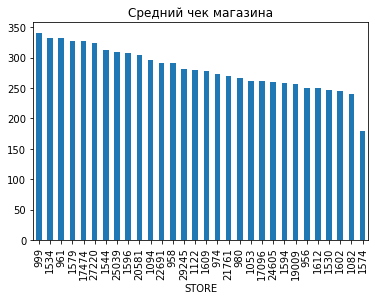

In [115]:
store_txn_mean.plot(kind='bar', title='Средний чек магазина')

#### 2) ср. кол-во чеков на 1 магазин. в день

In [116]:
# get count of TXN's for each store per day
store_txns = df_txn.groupby(by=['STORE', 'DAY'])['TXN'].count()
# store_txns

In [117]:
# get mean count of TXN's for each STORE
store_txns_mean = store_txns.groupby(by=['STORE']).mean().sort_values(ascending=False)
store_txns_mean

STORE
17474    4761.833333
21761    3736.616667
1579     3236.300000
1094     3206.733333
17096    2942.666667
19009    2912.116667
1534     2893.766667
999      2821.983333
1082     2799.333333
25039    2664.550000
1612     2510.466667
1609     2428.333333
22691    2418.733333
1596     2284.483333
956      2225.400000
961      2196.783333
1594     2178.433333
958      2138.083333
1544     2096.000000
27220    2080.533333
1053     2070.783333
1602     1667.383333
1122     1646.400000
20581    1641.233333
24605    1613.266667
29245    1580.700000
1574     1273.016667
974      1176.366667
980      1020.433333
1530      882.566667
Name: TXN, dtype: float64

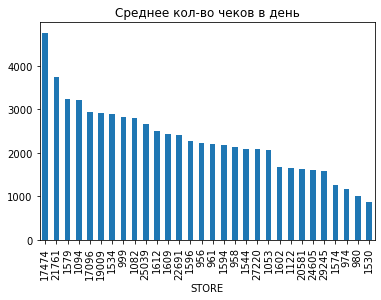

In [83]:
store_txns_mean.plot(kind='bar', title='Среднее кол-во чеков в день')

#### 3) ср. продажи на 1 магазин. в день (детализация до товара/группы не нужна)

In [88]:
# find SALES for each STORE per DAY
store_day_sales = df_txn.groupby(by=['STORE', 'DAY'])['SALES'].sum()
store_day_sales.head()

STORE  DAY       
1053   2015-10-01    123427.9594
       2015-10-02    124246.8303
       2015-10-03    110410.3021
       2015-10-04    116777.4891
       2015-10-05    136899.0184
Name: SALES, dtype: float64

In [95]:
store_day_sales_mean = store_day_sales.groupby(by=['STORE']).mean().sort_values(ascending=False)
store_day_sales_mean

STORE
17474    302779.283275
21761    222301.690140
1579     215347.507243
1094     199862.460505
999      195583.280112
1534     190155.807552
17096    182156.325575
1082     179250.137685
19009    173155.001582
25039    172206.437297
22691    155661.240610
1596     151465.273347
1612     151181.831087
1544     144515.739408
1609     142547.433715
961      142108.368042
956      140252.024170
1594     138906.304327
958      138460.785603
27220    137352.428058
1053     129124.441567
20581    115345.748140
1122     104802.110623
1602     104735.586643
29245    101103.155797
24605    100080.106913
974       72063.163267
1574      70957.056503
980       65188.639872
1530      54578.637137
Name: SALES, dtype: float64

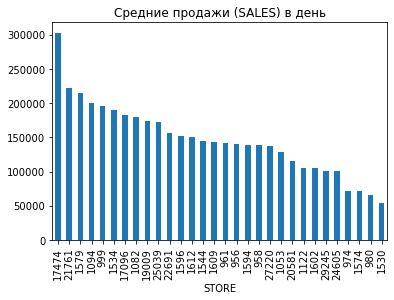

In [96]:
store_day_sales_mean.plot(kind='bar', title='Средние продажи (SALES) в день')

## 2. Сравнить эти показатели в октябре и ноябре между магазинами. 
### Визуально представить результат.

In [202]:
def plot_two_bars(series_left, series_right, left_label, right_label, title=""):
    # sort by indexes both Series
    series_left = series_left.sort_index()
    series_right = series_right.sort_index()
    if not np.all(series_left.index == series_right.index):
        print('Indexes are not equal!')
    tmp_df = pd.DataFrame(data={'left': series_left.values, 'right': series_right.values}, index=series_left.index.values)
    tmp_df = tmp_df.sort_values(by=['left', 'right'], ascending=False)
    
    # create axes to plot both series
    fig, ax = plt.subplots(1, 1, figsize=(14, 7))
    bar_width = 0.8
    ticks = np.arange(tmp_df.shape[0]) * 2.2  # X positions for bars 

    ax.bar(ticks+bar_width, height=tmp_df['right'], width=bar_width, label=right_label)  # plot bar shifted to right
    ax.bar(ticks, height=tmp_df['left'], width=bar_width, label=left_label)  # plot bar normal position

    ax.set_xticks(ticks+bar_width/2)  # set middle position between two bars
    ax.set_xticklabels(tmp_df.index.values, rotation=45)  # set labels for two bars
    ax.set_title(title)
    ax.legend()
    plt.show()

In [197]:
oct_txns = df_txn[df_txn['DAY'].dt.month == 10]  # get all data for october
nov_txns = df_txn[df_txn['DAY'].dt.month == 11]  # get all data for november

### 2.1 Средний чек магазина

In [198]:
oct_mean_txn = oct_txns.groupby(by=['STORE', 'TXN'])['SALES'].sum().groupby(by=['STORE']).mean()
nov_mean_txn = nov_txns.groupby(by=['STORE', 'TXN'])['SALES'].sum().groupby(by=['STORE']).mean()

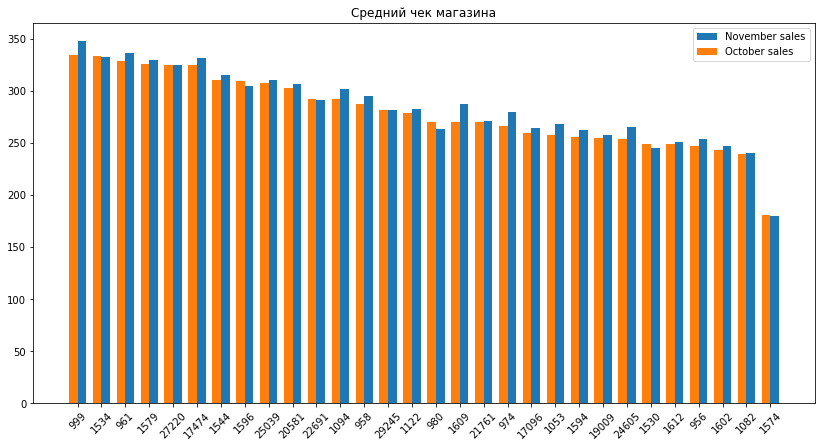

In [203]:
plot_two_bars(oct_mean_txn, nov_mean_txn, 
              left_label='October sales', 
              right_label="November sales", 
              title='Средний чек магазина')

### 2.2 ср. кол-во чеков на 1 магазин. в день

In [204]:
oct_txns_count = oct_txns.groupby(by=['STORE', 'DAY'])['TXN'].count().groupby(by=['STORE']).mean().sort_values(ascending=False)
nov_txns_count = nov_txns.groupby(by=['STORE', 'DAY'])['TXN'].count().groupby(by=['STORE']).mean().sort_values(ascending=False)

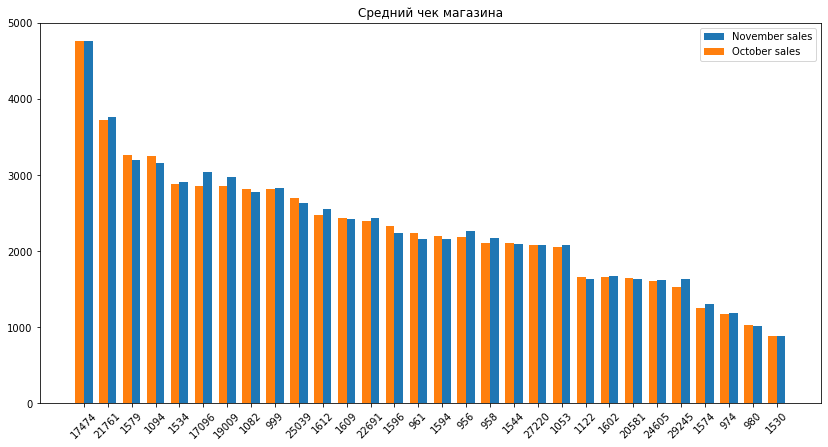

In [205]:
plot_two_bars(oct_txns_count, nov_txns_count, 
              left_label='October sales', 
              right_label="November sales", 
              title='Средний чек магазина')

### 2.3 Средние продажи на 1 магазин в день 

In [164]:
oct_store_day_sales_mean = oct_txns.groupby(by=['STORE', 'DAY'])['SALES'].sum().groupby(by=['STORE']).mean().sort_values(ascending=False)
nov_store_day_sales_mean = nov_txns.groupby(by=['STORE', 'DAY'])['SALES'].sum().groupby(by=['STORE']).mean().sort_values(ascending=False)

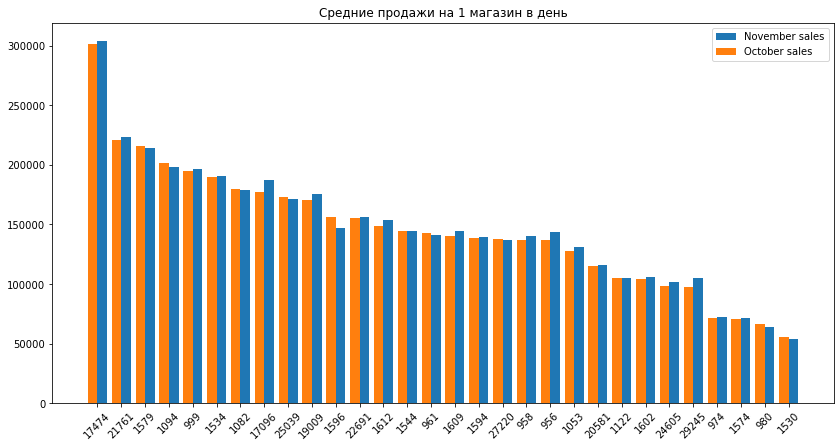

In [193]:
plot_two_bars(oct_store_day_sales_mean, nov_store_day_sales_mean, 
              left_label='October sales', 
              right_label="November sales", 
              title='Средние продажи на 1 магазин в день')